In [25]:
import os.path
import ast
import re
import numpy as np
import matplotlib.pyplot as plt

In [26]:
data_root = './logs/250410-140616_FeatureExtraction_Cataract101FeatureExtract_cnn_OneHeadResNet50Model/cataract_pickle_export/1.0fps'
files = [f'{data_root}/video_{i}_1.0fps_acc.txt' for i in range(86, 101)]


def extract_metrics(line):
    acc_match = re.search(r"acc:\s*([\d.]+)", line)
    f1_match = re.search(r"f1:\s*([\d.]+)", line)

    acc = float(acc_match.group(1)) if acc_match else None
    f1 = float(f1_match.group(1)) if f1_match else None

    return acc, f1


def extract_tpr_ppv_metrics(line):
    ppv_match = re.search(r"ppv:\s*(\{[^}]+\})", line)
    tpr_match = re.search(r"tpr:\s*(\{[^}]+\})", line)

    ppv = ast.literal_eval(ppv_match.group(1)) if ppv_match else None
    tpr = ast.literal_eval(tpr_match.group(1)) if tpr_match else None

    return ppv, tpr


def plot_avg_acc_and_f1():
    acc_list = []
    f1_list = []
    if not os.path.isdir(data_root):
        raise Exception(f"The given path {data_root} does not exist!")
    for file in files:
        if not os.path.exists(file):
            raise Exception(f"The given log file {file} does not exist!")
        with open(file, 'r') as f:
            line = f.read().strip()
        acc, f1 = extract_metrics(line)
        acc_list.append(acc)
        f1_list.append(f1)
    print(f"Avearge accuracy: {np.mean(acc_list)} +- {np.std(acc_list)}")
    print(f"Average F1 Score: {np.mean(f1_list)} +- {np.std(f1_list)}")

def plot_ppv_and_tpr():
    ppv_list = []
    tpr_list = []
    if not os.path.isdir(data_root):
        raise Exception(f"The given path {data_root} does not exist!")
    for file in files:
        if not os.path.exists(file):
            raise Exception(f"The given log file {file} does not exist!")
        with open(file, 'r') as f:
            line = f.read().strip()
        ppv, tpr = extract_tpr_ppv_metrics(line)
        ppv_list.append(ppv)
        tpr_list.append(tpr)
    ppv_keys = sorted(set().union(*(d.keys() for d in ppv_list)))
    tpr_keys = sorted(set().union(*(d.keys() for d in tpr_list)))
    ppv_box_data = []
    tpr_box_data = []
    for key in ppv_keys:
        values = [d[key] for d in ppv_list if key in d]
        ppv_box_data.append(values)
    for key in tpr_keys:
        values = [d[key] for d in tpr_list if key in d]
        tpr_box_data.append(values)
    ppv_keys = [key + 1 for key in ppv_keys]
    tpr_keys = [key + 1 for key in tpr_keys]
    all_ppv_values = [x for sublist in ppv_box_data for x in sublist]
    all_tpr_values = [x for sublist in tpr_box_data for x in sublist]
    print(f"Average Stage-wise Precision: {np.mean(all_ppv_values)} +- {np.std(all_ppv_values)}")
    print(f"Average Stage-wise Recall: {np.mean(all_tpr_values)} +- {np.std(all_tpr_values)}")
    plt.figure(figsize=(10, 6))
    plt.boxplot(ppv_box_data, tick_labels=ppv_keys, patch_artist=True)
    plt.xlabel('Class')
    plt.ylabel('Values')
    plt.title('Precision for Each Class')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    plt.figure(figsize=(10, 6))
    plt.boxplot(tpr_box_data, tick_labels=tpr_keys, patch_artist=True)
    plt.xlabel('Class')
    plt.ylabel('Values')
    plt.title('Recall for Each Class')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

Avearge accuracy: 0.8141608582860884 +- 0.07423153270098796
Average F1 Score: 0.7663957659325685 +- 0.0819018561908302
Average Stage-wise Precision: 0.8097102623507892 +- 0.19866611361207598
Average Stage-wise Recall: 0.7955618174490652 +- 0.21812966761449515


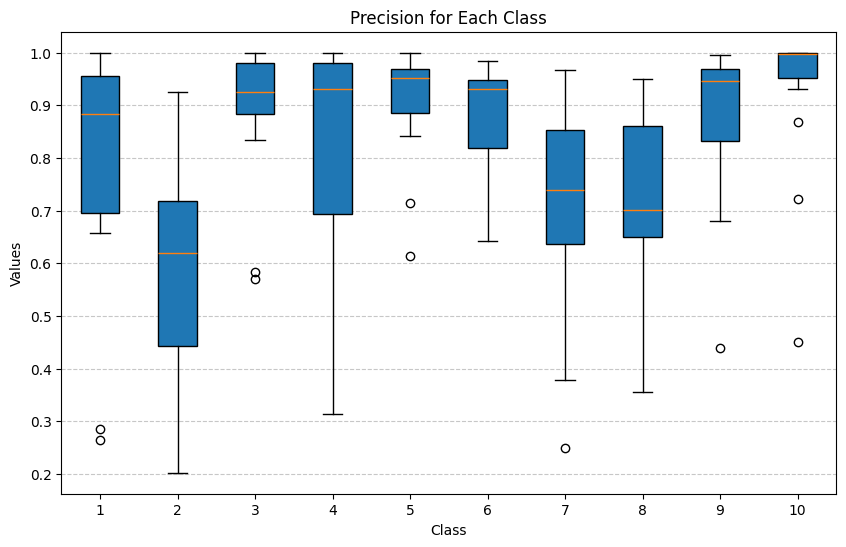

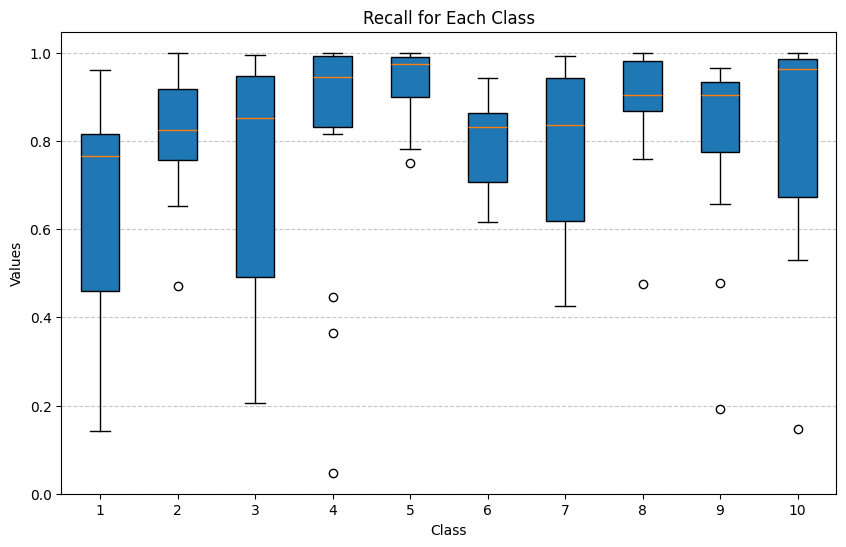

In [27]:
plot_avg_acc_and_f1()
plot_ppv_and_tpr()